# Using context managers

## Examples

### 1. open( )

In [ ]:
with open('my_file.txt') as my_file:
    text = my_file.read()
    length = len(text)

print('The file is {} characters long'.format(length))

### 2. timer( )

In [ ]:
image = get_image_from_instagram()

# Time how long process_with_numpy(image) takes to run
with timer():
  print('Numpy version')
  process_with_numpy(image)

# Time how long process_with_pytorch(image) takes to run
with timer():
  print('Pytorch version')
  process_with_pytorch(image)

# yield

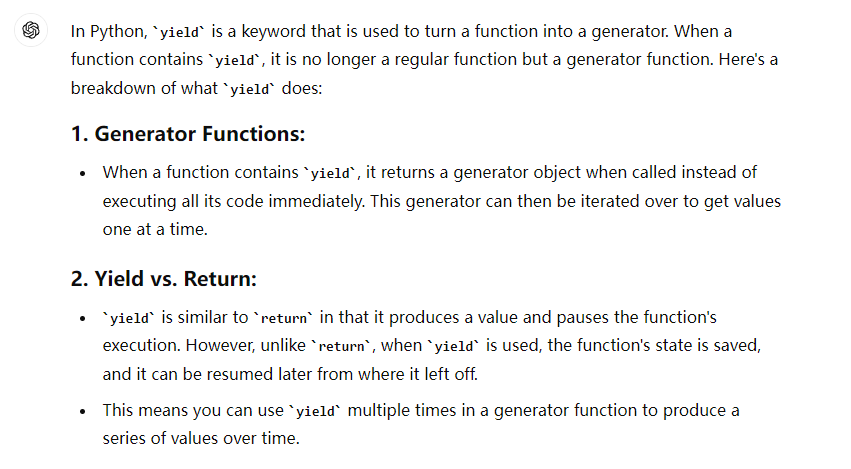

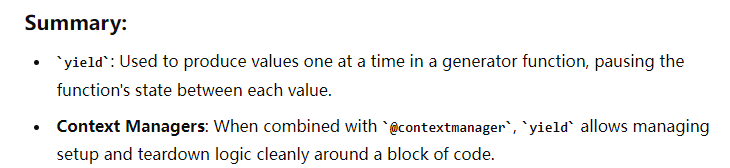

## Two ways to define a context manager
### Class-based and Function-based

In [ ]:
# from contextlib import contextmanager
# @contextmanager
@contextlib.contextmanager
def my_context():
    # set up code
    yield
    # teardown code

In [3]:
# example
from contextlib import contextmanager
@contextmanager
def my_context():
    print('hello')
    yield 42
    print('byebye')

with my_context() as foo:
    print('foo is {}'.format(foo))

hello
foo is 42
byebye


In [ ]:
# example for yield
from contextlib import contextmanager
@contextmanager
def database(url):
    # set up connection
    db = postgres.connect(url)

    yield db

    # disconnection
    db.disconnect()

url = 'http://datacamp.com/data'
with database(url) as my_db:
    course_list = my_db.excute(
        'select * from courses'
    )


## timer( ) context manager

In [ ]:
# Add a decorator that will make timer() a context manager
@contextlib.contextmanager
def timer():
    """Time the execution of a context block.

    Yields:
        None
    """
    start = time.time()
    # Send control back to the context block
    yield  # This is where the control is passed back to the with block
    end = time.time()
    print('Elapsed: {:.2f}s'.format(end - start))

with timer():
    print('This should take approximately 0.25 seconds')
    time.sleep(0.25)

### A read-only open() context manager

In [ ]:
@contextlib.contextmanager
def open_read_only(filename):
  """Open a file in read-only mode.

  Args:
    filename (str): The location of the file to read

  Yields:
    file object
  """
  read_only_file = open(filename, mode='r')
  # Yield read_only_file so it can be assigned to my_file
  yield read_only_file
  # Close read_only_file
  read_only_file.close()

with open_read_only('my_file.txt') as my_file:
  print(my_file.read())

# Nested Contexts

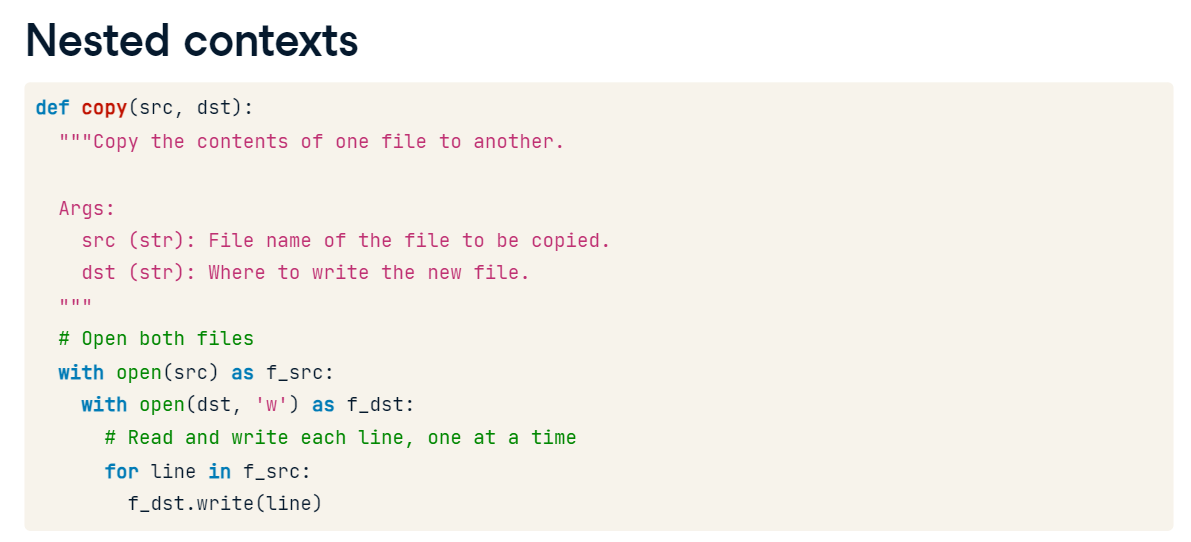

### Scraping the NASDAQ

In [ ]:
# Use the "stock('NVDA')" context manager
# and assign the result to the variable "nvda"
with stock('NVDA') as nvda:
    # Open "NVDA.txt" for writing as f_out
    with open('NVDA.txt', 'w') as f_out:
      for _ in range(10):
        value = nvda.price()
        print('Logging ${:.2f} for NVDA'.format(value))
        f_out.write('{:.2f}\n'.format(value))

### Changing the working directory

In [ ]:
def in_dir(directory):
  """Change current working directory to `directory`,
  allow the user to run some code, and change back.

  Args:
    directory (str): The path to a directory to work in.
  """
  current_dir = os.getcwd()
  os.chdir(directory)

  # Add code that lets you handle errors
  try:
    yield
  # Ensure the directory is reset,
  # whether there was an error or not
  finally:
    os.chdir(current_dir)